This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to December 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset. Check here to learn more about this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\shivom.moyade\Downloads\archive (2)\US_Accidents_Dec20_updated.csv")

# Data Preparation and Cleaning

In [3]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1516064 non-null  int64  
 1   Start_Lat          1516064 non-null  float64
 2   Start_Lng          1516064 non-null  float64
 3   End_Lat            1516064 non-null  float64
 4   End_Lng            1516064 non-null  float64
 5   Distance(mi)       1516064 non-null  float64
 6   Number             469969 non-null   float64
 7   Temperature(F)     1473031 non-null  float64
 8   Wind_Chill(F)      1066748 non-null  float64
 9   Humidity(%)        1470555 non-null  float64
 10  Pressure(in)       1479790 non-null  float64
 11  Visibility(mi)     1471853 non-null  float64
 12  Wind_Speed(mph)    1387202 non-null  float64
 13  Precipitation(in)  1005515 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 161.9 MB


In [7]:
missing_data_percentage=df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_data_percentage

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

In [8]:
missing_data_percentage[missing_data_percentage>0]

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
dtype: float64

<AxesSubplot:>

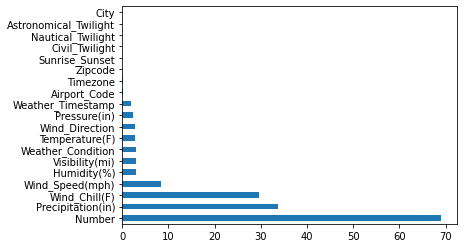

In [9]:
missing_data_percentage[missing_data_percentage>0].plot(kind="barh")

In [10]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

City,Temperature(F),Start_Time,Weather_Condition,Start_Lat,Start_Lng 
will do analysis of these columns first

### City column analysis

In [11]:
cities=df["City"].unique()
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [12]:
len(cities)

10658

In [13]:
cities[:100]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Batavia', 'Cleveland', 'Lima', 'Westerville', 'Jamestown',
       'Freeport', 'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell',
       'Edinburgh', 'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', '

In [14]:
top_cities_by_accident=df["City"].value_counts()
top_cities_by_accident

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

<AxesSubplot:>

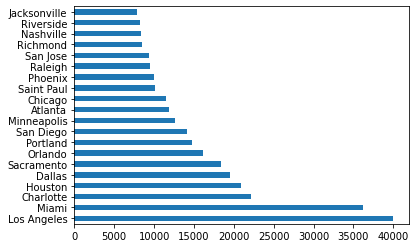

In [15]:
top_cities_by_accident[:20].plot(kind="barh")

--Among the top 100 cities by accidents ,which state they belong to most frequently

<AxesSubplot:xlabel='City', ylabel='Count'>

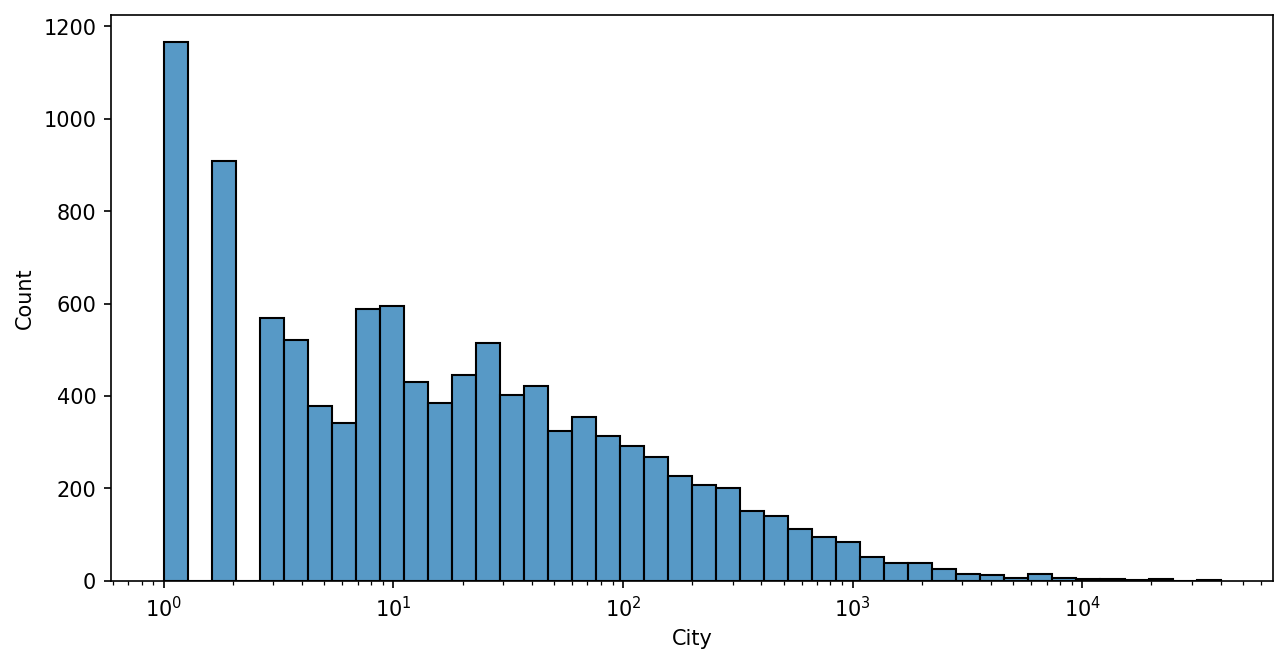

In [16]:
fig=plt.figure(figsize=(10,5),dpi=150)
sns.histplot(top_cities_by_accident,log_scale=True)

In [17]:
high_accidents_cities=top_cities_by_accident[top_cities_by_accident>=1000]
low_accidents_cities=top_cities_by_accident[top_cities_by_accident<1000]

In [18]:
#percentage of cities having more than 1000 accidents
len(high_accidents_cities)/len(top_cities_by_accident)*100

2.3552594538800786

<AxesSubplot:xlabel='City', ylabel='Count'>

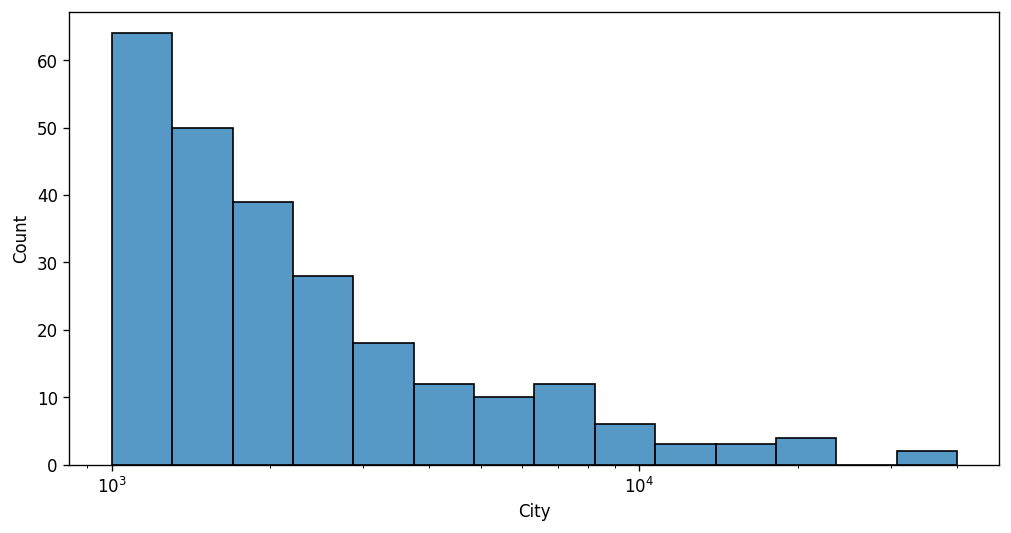

In [19]:
fig=plt.figure(figsize=(10,5),dpi=120)
sns.histplot(high_accidents_cities,log_scale=True)


<AxesSubplot:xlabel='City', ylabel='Count'>

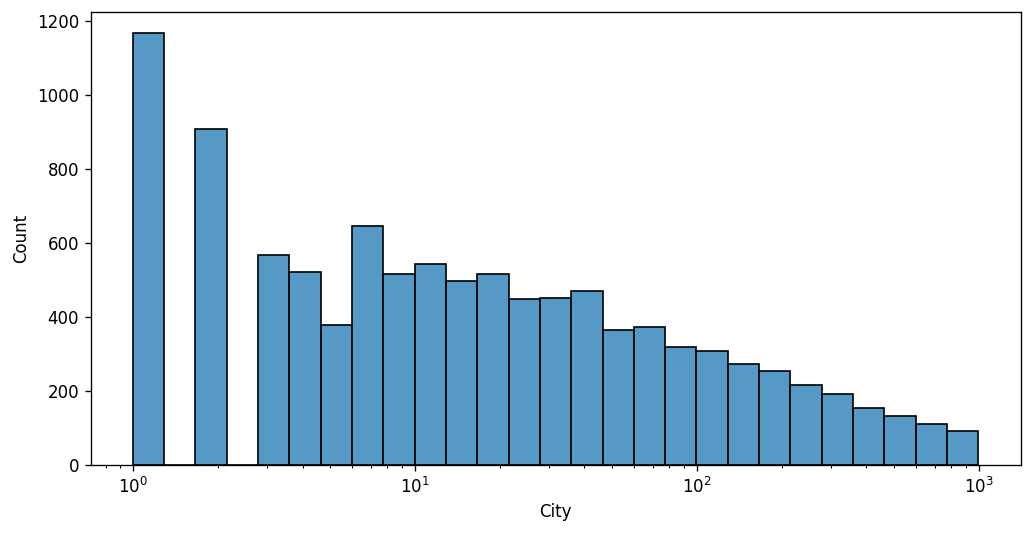

In [20]:
fig=plt.figure(figsize=(10,5),dpi=120)
sns.histplot(low_accidents_cities,log_scale=True)


In [21]:
top_cities_by_accident[top_cities_by_accident == 1]
#just 1 accident reported in 1167 cities

South Paris                     1
Aberdeen Proving Ground         1
Rebecca                         1
Hiltons                         1
Jeanerette                      1
                               ..
Manzanita                       1
West Brooklyn                   1
Garfield Heights                1
Belding                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1167, dtype: int64

Number of accidents per city decreases expoonentially

### Start time column analysis

In [22]:
df["Start_Time"]

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [23]:
#convert string into data time
df_Start_Time=pd.to_datetime(df["Start_Time"])
df_Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [24]:
df_Start_Time[0]
#its a timestamp

Timestamp('2016-02-08 00:37:08')

In [25]:
df_hour=df_Start_Time.dt.hour

c:\users\shivom.moyade\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

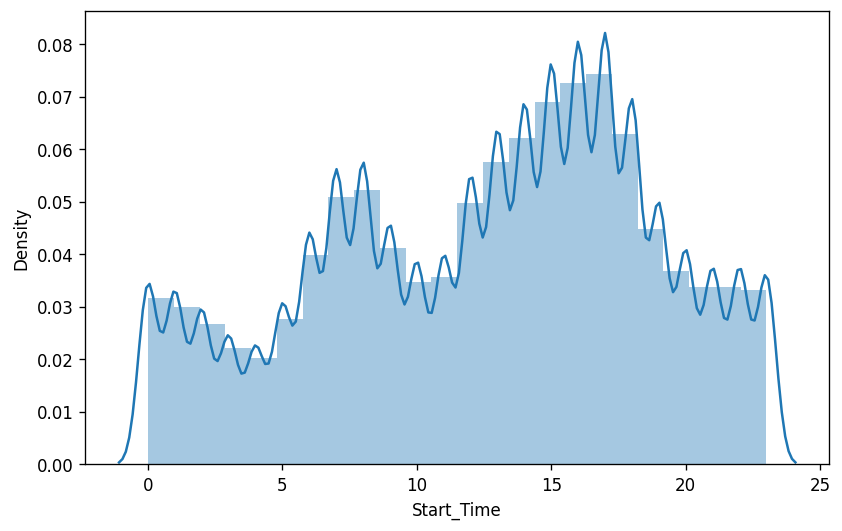

In [26]:
fig=plt.figure(figsize=(8,5),dpi=120)
sns.distplot(df_hour,bins=24)


c:\users\shivom.moyade\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

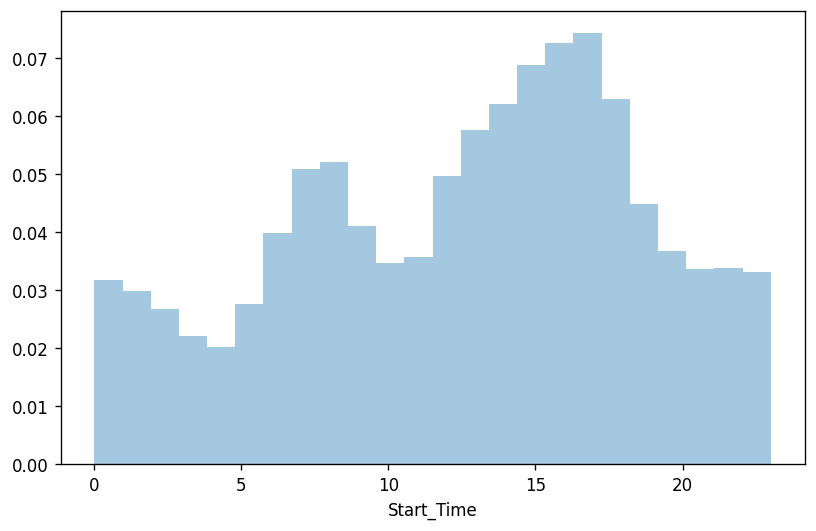

In [27]:
#now for getting into percentages use norm hist
fig=plt.figure(figsize=(8,5),dpi=120)
sns.distplot(df_hour,bins=24,norm_hist=True,kde=False)
#high percentage occured between 15 to 17 pm and next is 6 to 8 am

In [28]:
#On the basis of day of the week 
df_day=df_Start_Time.dt.dayofweek
df_day

0          0
1          0
2          0
3          0
4          0
          ..
1516059    4
1516060    4
1516061    4
1516062    4
1516063    4
Name: Start_Time, Length: 1516064, dtype: int64

<AxesSubplot:xlabel='Start_Time'>

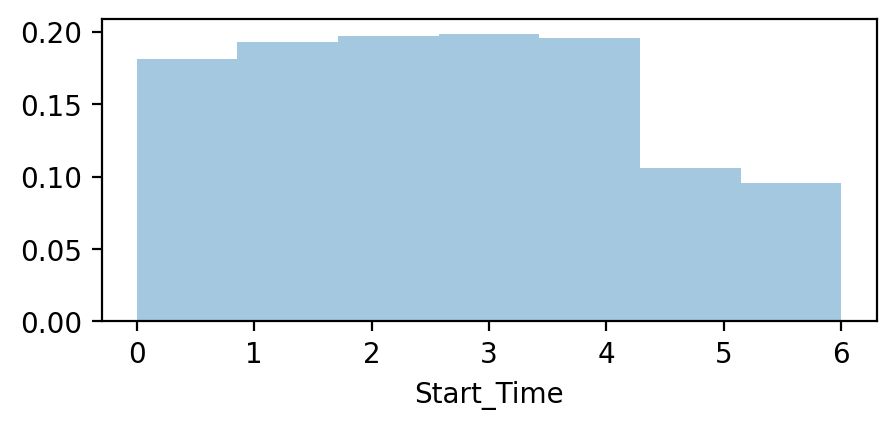

In [29]:
fig=plt.figure(figsize=(5,2),dpi=200)
sns.distplot(df_day,bins=7,norm_hist=True,kde=False)

In [30]:
#Is distribution of accidents by hour the same on the weekdays as on weekends
df_Start_Time.dt.dayofweek==6

0          False
1          False
2          False
3          False
4          False
           ...  
1516059    False
1516060    False
1516061    False
1516062    False
1516063    False
Name: Start_Time, Length: 1516064, dtype: bool

In [31]:
df_sunday=df_Start_Time[df_Start_Time.dt.dayofweek==6]
df_sunday

158       2016-02-14 03:58:33
159       2016-02-14 05:26:58
160       2016-02-14 16:30:40
161       2016-02-14 16:38:40
162       2016-02-14 17:40:17
                  ...        
1513810   2019-08-18 22:48:14
1513811   2019-08-18 23:24:10
1513925   2019-08-18 22:56:56
1513926   2019-08-18 22:56:56
1513965   2019-08-18 22:54:41
Name: Start_Time, Length: 123775, dtype: datetime64[ns]

<AxesSubplot:xlabel='Start_Time'>

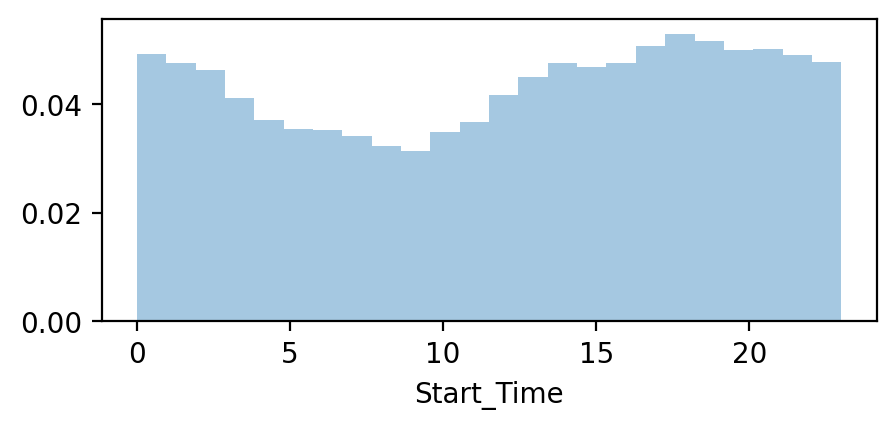

In [32]:
fig=plt.figure(figsize=(5,2),dpi=200)
sns.distplot(df_sunday.dt.hour,bins=24,norm_hist=True,kde=False)
#sunday hourly accidents data 

<AxesSubplot:xlabel='Start_Time'>

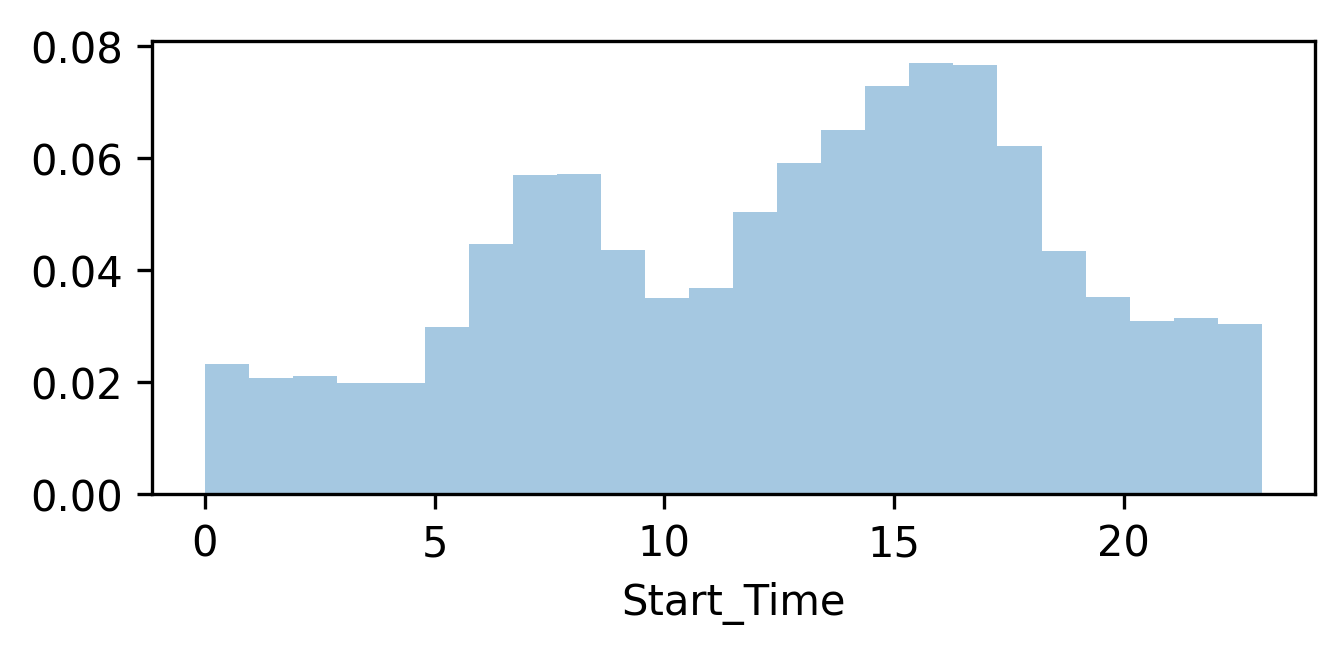

In [33]:
df_monday=df_Start_Time[df_Start_Time.dt.dayofweek==0]
df_monday
fig=plt.figure(figsize=(5,2),dpi=300)
sns.distplot(df_monday.dt.hour,bins=24,norm_hist=True,kde=False)

<AxesSubplot:xlabel='Start_Time'>

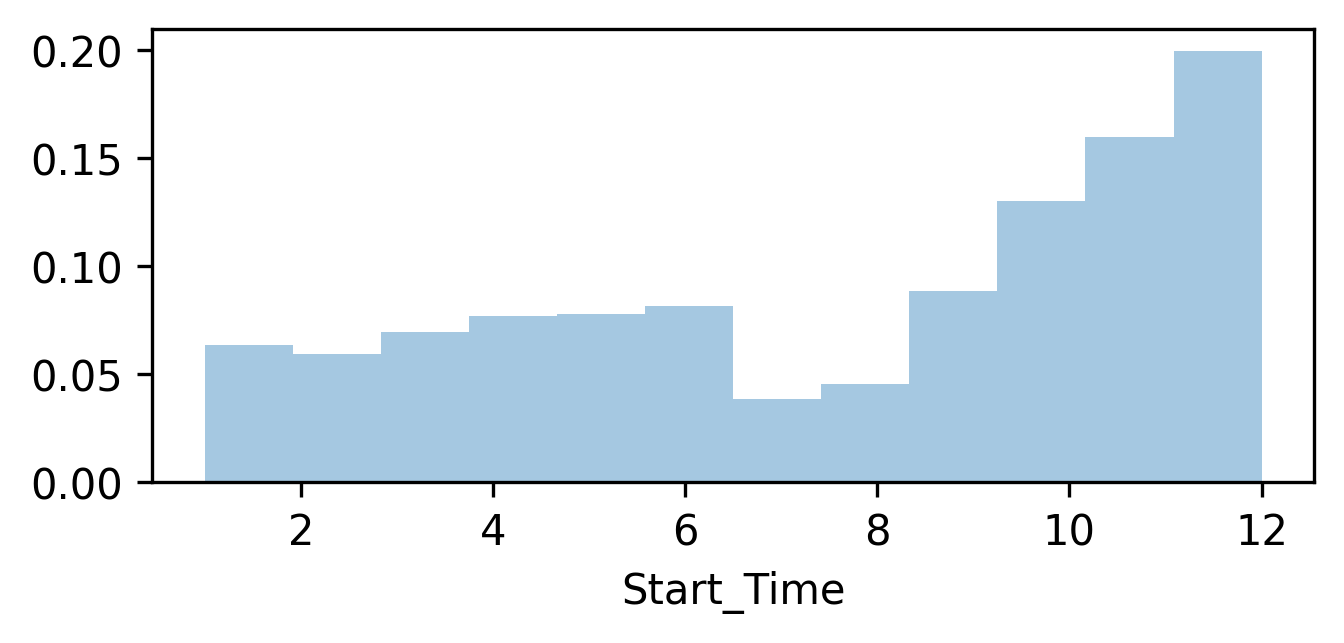

In [34]:
#Month wise tren of accidents
df_month=df_Start_Time.dt.month
df_month
fig=plt.figure(figsize=(5,2),dpi=300)
sns.distplot(df_month,bins=12,norm_hist=True,kde=False)
#Max accidents occurs in nov and dec according to this

<AxesSubplot:xlabel='Start_Time'>

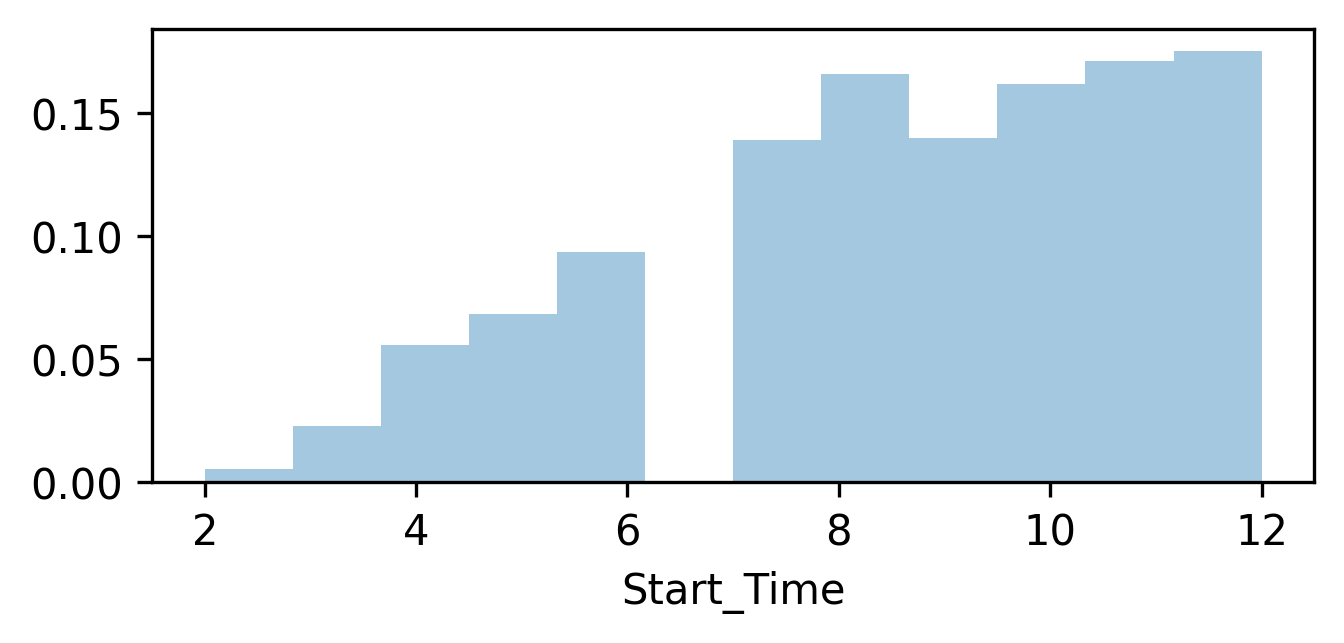

In [35]:
df_year=df_Start_Time[df_Start_Time.dt.year==2016]
df_year
fig=plt.figure(figsize=(5,2),dpi=300)
sns.distplot(df_year.dt.month,bins=12,norm_hist=True,kde=False)
#it means we dont have enough data for 2016

<AxesSubplot:xlabel='Start_Time'>

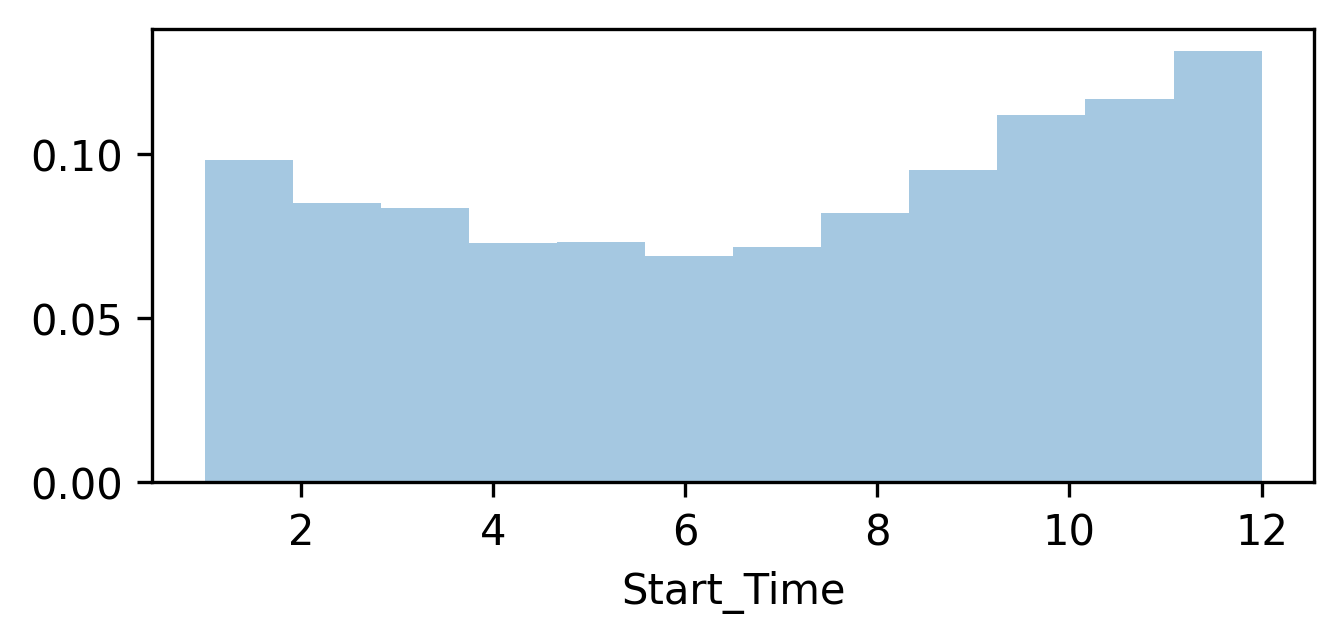

In [36]:
df_year=df_Start_Time[df_Start_Time.dt.year==2018]
df_year
fig=plt.figure(figsize=(5,2),dpi=300)
sns.distplot(df_year.dt.month,bins=12,norm_hist=True,kde=False)

### Start latitude an longitude columns analysis

In [37]:
df["Start_Lat"]

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [38]:
df["Start_Lng"]

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

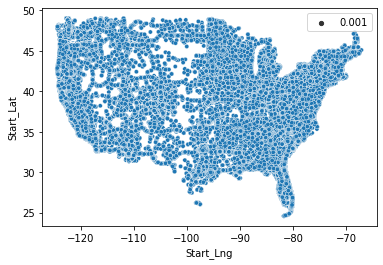

In [39]:
sns.scatterplot(data=df,x="Start_Lng",y="Start_Lat",size=0.001)

In [40]:
#for drawing on the map 
#!pip install folium
import folium
mapp=folium.Map()


You should consider upgrading via the 'c:\users\shivom.moyade\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [41]:
lat,lon=df["Start_Lat"][0],df["Start_Lng"][0]
lat,lon

(40.10891, -83.09286)

In [42]:
mapp=folium.Map()
marker=folium.Marker((lat,lon))
marker.add_to(mapp)
mapp

In [44]:
lat_lon_pairs=list(zip(df["Start_Lat"],df["Start_Lng"]))

In [ ]:
# from folium.plugins import HeatMap
# mapp=folium.Map()
# HeatMap(lat_lon_pairs).add_to(mapp)
# mapp
